### Modelo Tree

In [1]:
import pandas as pd
import numpy as np

#Librerias Visualizacion
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns 
from pylab import rcParams 

#Libreria Metricas
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Librerias Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 

# librerias Procesamieno Feature_engineering
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier 
from collections import Counter

# Libreria Dimensionalidad
from sklearn.decomposition import PCA


In [2]:
df = pd.read_csv('/home/dsc/Master-Kschool/TFM/Financial-Product-Sales-Forecast-Model/0rigin_data/cleanned_data/df.tfm')

In [3]:
df.head(2)

,cliente,saldo_captacion,esta_carterizado,cliente_bbp,tipo_gestor,gestor,cartera_patron,codigo_cartera,digital_3_meses,camino_digital,...,edad,seg_valor,seg_recorrido,dz,oficina,lp_seg_vida,lp_seg_acc,lp_seg_salud,lp_seg_hogar,lp_seg_auto
0,1,1328106.49,SI,NO,ASESOR FINANCIERO,18287.0,ASESORAMIENTO FINANCIERO,14881.0,SI,COMPRADOR,...,69.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,1,0
1,2,1142234.34,SI,NO,ASESOR FINANCIERO,18287.0,ASESORAMIENTO FINANCIERO,14881.0,SI,COMPRADOR,...,81.0,ALTO,ALTO RECORRIDO,2,210,0,0,0,0,0


In [4]:
df.columns

Index(['cliente', 'saldo_captacion', 'esta_carterizado', 'cliente_bbp',
       'tipo_gestor', 'gestor', 'cartera_patron', 'codigo_cartera',
       'digital_3_meses', 'camino_digital', 'saldo_financiacion', 'saldo_ffii',
       'saldo_plp', 'lp_dom_ingresos', 'lp_tjta_cto', 'lp_tjt_rev', 'lp_rbos',
       'lp_of_int', 'marca_bp', 'marca_ccte', 'edad', 'seg_valor',
       'seg_recorrido', 'dz', 'oficina', 'lp_seg_vida', 'lp_seg_acc',
       'lp_seg_salud', 'lp_seg_hogar', 'lp_seg_auto'],
      dtype='object')

## LABEL ENCODER

In [5]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()

In [6]:
lbl.fit_transform(df['tipo_gestor'])
lbl.fit_transform(df['esta_carterizado'])
lbl.fit_transform(df['cliente_bbp'])
lbl.fit_transform(df['cartera_patron'])
lbl.fit_transform(df['digital_3_meses'])
lbl.fit_transform(df['camino_digital'])
lbl.fit_transform(df['marca_bp'])
lbl.fit_transform(df['marca_ccte'])
lbl.fit_transform(df['seg_valor'])
lbl.fit_transform(df['seg_recorrido'])


array([1, 0, 1, ..., 3, 3, 0])

In [7]:
df['tipo_gestor_etiqueta']=lbl.fit_transform(df['tipo_gestor'])
df['esta_carterizado_etiqueta']=lbl.fit_transform(df['esta_carterizado'])
df['cliente_bbp_etiqueta']=lbl.fit_transform(df['cliente_bbp'])
df['cartera_patron_etiqueta']=lbl.fit_transform(df['cartera_patron'])
df['digital_3_meses_etiqueta']=lbl.fit_transform(df['digital_3_meses'])
df['camino_digital_etiqueta']=lbl.fit_transform(df['camino_digital'])
df['marca_bp_etiqueta']=lbl.fit_transform(df['marca_bp'])
df['marca_ccte_etiqueta']=lbl.fit_transform(df['marca_ccte'])
df['seg_valor_etiqueta']=lbl.fit_transform(df['seg_valor'])
df['seg_recorrido_etiqueta']=lbl.fit_transform(df['seg_recorrido'])

In [8]:
df['seg_recorrido_etiqueta'].value_counts()

0    163991
2    149923
1    127889
3      9571
Name: seg_recorrido_etiqueta, dtype: int64

In [9]:
df['seg_recorrido_etiqueta'].value_counts()

0    163991
2    149923
1    127889
3      9571
Name: seg_recorrido_etiqueta, dtype: int64

In [10]:
df.dtypes;

In [11]:

df.drop(['tipo_gestor','esta_carterizado','cliente_bbp','cartera_patron','digital_3_meses','camino_digital',
         'marca_bp','marca_ccte','seg_valor','seg_recorrido'],axis = 1,inplace = True)

In [12]:
df.columns

Index(['cliente', 'saldo_captacion', 'gestor', 'codigo_cartera',
       'saldo_financiacion', 'saldo_ffii', 'saldo_plp', 'lp_dom_ingresos',
       'lp_tjta_cto', 'lp_tjt_rev', 'lp_rbos', 'lp_of_int', 'edad', 'dz',
       'oficina', 'lp_seg_vida', 'lp_seg_acc', 'lp_seg_salud', 'lp_seg_hogar',
       'lp_seg_auto', 'tipo_gestor_etiqueta', 'esta_carterizado_etiqueta',
       'cliente_bbp_etiqueta', 'cartera_patron_etiqueta',
       'digital_3_meses_etiqueta', 'camino_digital_etiqueta',
       'marca_bp_etiqueta', 'marca_ccte_etiqueta', 'seg_valor_etiqueta',
       'seg_recorrido_etiqueta'],
      dtype='object')

In [13]:
df['edad']=df['edad'].astype(int)
df.dtypes

cliente                        int64
saldo_captacion              float64
gestor                       float64
codigo_cartera               float64
saldo_financiacion           float64
saldo_ffii                   float64
saldo_plp                    float64
lp_dom_ingresos                int64
lp_tjta_cto                    int64
lp_tjt_rev                     int64
lp_rbos                        int64
lp_of_int                      int64
edad                           int64
dz                             int64
oficina                        int64
lp_seg_vida                    int64
lp_seg_acc                     int64
lp_seg_salud                   int64
lp_seg_hogar                   int64
lp_seg_auto                    int64
tipo_gestor_etiqueta           int64
esta_carterizado_etiqueta      int64
cliente_bbp_etiqueta           int64
cartera_patron_etiqueta        int64
digital_3_meses_etiqueta       int64
camino_digital_etiqueta        int64
marca_bp_etiqueta              int64
m

# OUTLIERS

In [15]:
posibles_variables_con_outliers = df[['edad','saldo_captacion','saldo_financiacion','saldo_ffii','saldo_plp']]

,edad,saldo_captacion,saldo_financiacion,saldo_ffii,saldo_plp
count,451374.000000,4.513740e+05,4.513740e+05,4.513740e+05,451374.000000
mean,58.268941,4.971455e+04,1.380668e+04,8.483663e+03,1728.478326
std,19.018368,8.792364e+04,4.296438e+04,3.844671e+04,10780.622435
min,0.000000,-5.104332e+04,-4.900000e+03,0.000000e+00,0.000000
25%,45.000000,1.813182e+03,0.000000e+00,0.000000e+00,0.000000
50%,60.000000,1.520828e+04,0.000000e+00,0.000000e+00,0.000000
75%,73.000000,6.446964e+04,6.841775e+02,0.000000e+00,0.000000
max,118.000000,5.290216e+06,2.896317e+06,3.130940e+06,459937.460000


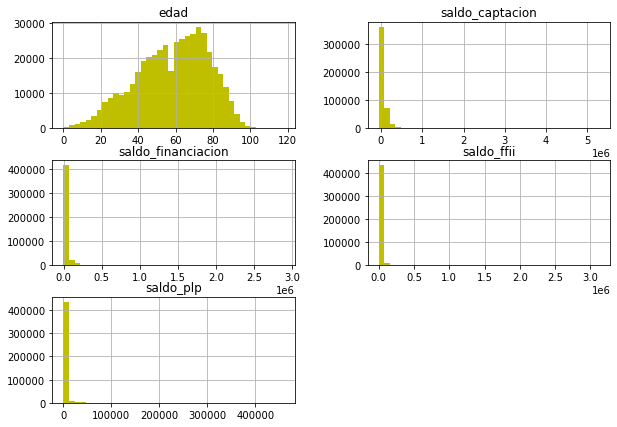

In [16]:
# Variable ffii. No contiene outliers. Son valores reales. La mayoria de los clientes no tienen saldos en ffii.
# Variable plp.  No contiene outliers. Son valores reales. La mayoria de los clientes no tienen saldos en plp.
# Variable Captacion. No tiene outliers. Son valores reales. Solamente modificamos los negativos a la media.
# Variable saldo Fin. No tiene outliers. Son valores reales.Solamente modificamos los negativos a la media
# Variable edad. Es la unica que puede tener ouliers reales.  Estidiamos y esos ouliers le damos valor de media.
posibles_variables_con_outliers.hist(figsize = (10,7), color = 'y', bins = 40);
posibles_variables_con_outliers.describe()

## OUTLIER EDAD

Boxplot edad


count    451374.000000
mean         58.268941
std          19.018368
min           0.000000
25%          45.000000
50%          60.000000
75%          73.000000
max         118.000000
Name: edad, dtype: float64

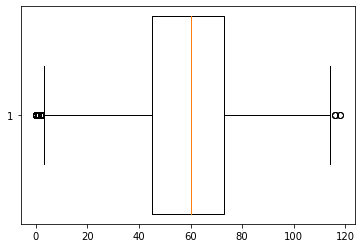

In [17]:
# Hacemos una primera visualizacion
print ('Boxplot edad')
plt.boxplot(df['edad'],vert = False,widths = 2)
plt.show   
df['edad'].describe()

In [18]:
print ('Cuartiles edad')
print('='*30)
Q1 = df['edad'].quantile(0.25)
print ('Primer cuartil',Q1)
print('='*30)
Q3 = df['edad'].quantile(0.75)
print ('Tercer cuartil',Q3)
print('='*30)
rangointercuartil = (Q3 - Q1)
print ('Rango_intercuartil',rangointercuartil)
print('='*30)
mediana = df['edad'].median()
print ('Mediana', mediana)
print('='*30)
minimo = df['edad'].min()
print ('Minimo', minimo)
print('='*30)
maximo = df['edad'].max()
print ('Maximo', maximo)

Cuartiles edad
Primer cuartil 45.0
Tercer cuartil 73.0
Rango_intercuartil 28.0
Mediana 60.0
Minimo 0
Maximo 118


In [19]:
#sacamos los extremos superiores e inferiores de los bigotes
print('='*30)
extremo_inferior = Q1 - 1.5 * rangointercuartil
print ('Extremo bigote_inferior', extremo_inferior)
print('='*30)
extremo_superior = Q3 + 1.5 * rangointercuartil
print ('Extremo bigote_superior', extremo_superior)
print('='*30)

Extremo bigote_inferior 3.0
Extremo bigote_superior 115.0


In [20]:
#detectamos los outliers
ubicacion_outliers = (df['edad'] < extremo_inferior) | (df['edad'] > extremo_superior)
#print ('ubicacion_outliers',ubicacion_outliers)

In [21]:
outliers = df['edad'][ubicacion_outliers]
outliers.count()
#print ('lista_outliers',outlier)

254

In [22]:
#detectamos tambien los NO outliers
resto_datos_no_outliers = (df['edad'] >= extremo_inferior) & (df['edad'] <= extremo_superior)
#print ('ubicacion_outliers',ubicacion_outliers)

In [23]:
no_outliers = df['edad'][resto_datos_no_outliers]
no_outliers.count()
#print ('lista_ubicacion_sin_outliers',sin_outlier)

451120

In [28]:
# No queremos eliminar los outliers ya que son muy pocos vs todo el df. Los transformamos a la media de edad
df[(df['edad']<3) & (df['edad']>=115)] = df['edad'].mean()


Boxplot edad


count    451374.000000
mean         58.299586
std          18.970610
min           3.000000
25%          45.000000
50%          60.000000
75%          73.000000
max         114.000000
Name: edad, dtype: float64

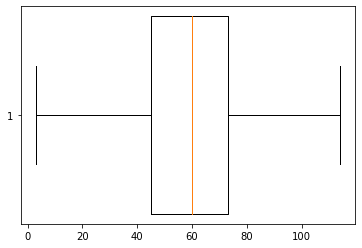

In [30]:
# Volvemos a hacer la  visualizacion
print ('Boxplot edad')
plt.boxplot(df['edad'],vert = False, widths = 2)
plt.show   
df['edad'].describe()

#  SALDO CAPTACION

In [14]:
# No queremos los valores negativos. Les damos valor de media.
df['saldo_captacion'].describe()

count    4.513740e+05
mean     4.971455e+04
std      8.792364e+04
min     -5.104332e+04
25%      1.813182e+03
50%      1.520828e+04
75%      6.446964e+04
max      5.290216e+06
Name: saldo_captacion, dtype: float64

In [15]:
# Hay 9439 clientes con saldo negativo . Solo el 2%
df[df['saldo_captacion'] < 0]['cliente'].nunique()

9440

In [16]:
df['cliente'].count()

451374

In [17]:
df[df['saldo_captacion'] < 0]['cliente'].nunique() / df['cliente'].count()

0.02091392060685817

In [18]:
# No queremos los valores negativos. Les damos valor de cero.
df[df['saldo_captacion'] < 0] = 0

In [19]:
# Sacamos nuvamente datos estadisticos..
df['saldo_captacion'].describe()

count    4.513740e+05
mean     4.971805e+04
std      8.792162e+04
min      0.000000e+00
25%      1.813182e+03
50%      1.520828e+04
75%      6.446964e+04
max      5.290216e+06
Name: saldo_captacion, dtype: float64

<AxesSubplot:>

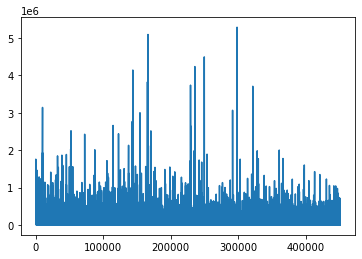

In [20]:
df['saldo_captacion'].plot()

#  SALDO FINANCIACION

In [21]:
# No queremos los valores negativos. Les damos valor de media.
df['saldo_financiacion'].describe()

count    4.513740e+05
mean     1.353979e+04
std      4.262430e+04
min     -4.900000e+03
25%      0.000000e+00
50%      0.000000e+00
75%      6.066900e+02
max      2.896317e+06
Name: saldo_financiacion, dtype: float64

In [22]:
# Hay 9439 clientes con saldo negativo . Solo el 2%
df[df['saldo_financiacion'] < 0]['cliente'].nunique()

696

In [23]:
df['cliente'].count()

451374

In [24]:
df[df['saldo_financiacion'] < 0]['cliente'].nunique() / df['cliente'].count()

0.0015419585532175093

In [25]:
df[df['saldo_financiacion'] < 0] = 0

In [26]:
# No queremos los valores negativos. Les damos valor de cero.
df['saldo_financiacion'].describe()

count    4.513740e+05
mean     1.354013e+04
std      4.262418e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      6.066900e+02
max      2.896317e+06
Name: saldo_financiacion, dtype: float64

<AxesSubplot:>

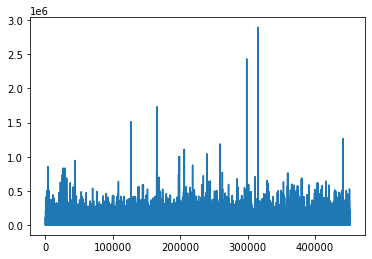

In [27]:
df['saldo_financiacion'].plot()

#  SALDO PLANES DE PENSION

In [28]:
df['saldo_plp'].describe()

count    451374.000000
mean       1720.115913
std       10755.266998
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      459937.460000
Name: saldo_plp, dtype: float64

<AxesSubplot:>

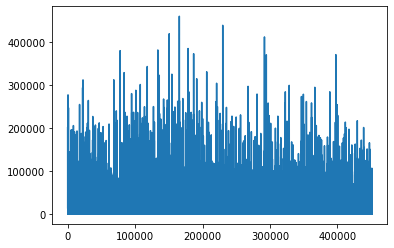

In [29]:
df['saldo_plp'].plot()

## __ADAPTAMOS EL DF SEGUN LAS VARIABLES QUE VAMOS A NECESITAR__



In [30]:
df.columns

Index(['cliente', 'saldo_captacion', 'gestor', 'codigo_cartera',
       'saldo_financiacion', 'saldo_ffii', 'saldo_plp', 'lp_dom_ingresos',
       'lp_tjta_cto', 'lp_tjt_rev', 'lp_rbos', 'lp_of_int', 'edad', 'dz',
       'oficina', 'lp_seg_vida', 'lp_seg_acc', 'lp_seg_salud', 'lp_seg_hogar',
       'lp_seg_auto', 'tipo_gestor_etiqueta', 'esta_carterizado_etiqueta',
       'cliente_bbp_etiqueta', 'cartera_patron_etiqueta',
       'digital_3_meses_etiqueta', 'camino_digital_etiqueta',
       'marca_bp_etiqueta', 'marca_ccte_etiqueta', 'seg_valor_etiqueta',
       'seg_recorrido_etiqueta'],
      dtype='object')

In [31]:
df = df[['edad','saldo_captacion','saldo_financiacion','saldo_ffii','saldo_plp',
              'lp_dom_ingresos','lp_tjta_cto','lp_tjt_rev','lp_rbos','lp_of_int',
              'lp_seg_vida','lp_seg_acc','lp_seg_salud','lp_seg_auto','lp_seg_hogar',
              'cartera_patron_etiqueta','digital_3_meses_etiqueta','camino_digital_etiqueta','marca_bp_etiqueta','marca_ccte_etiqueta',
              'seg_valor_etiqueta','seg_recorrido_etiqueta']]
               

In [32]:
df.describe()

,edad,saldo_captacion,saldo_financiacion,saldo_ffii,saldo_plp,lp_dom_ingresos,lp_tjta_cto,lp_tjt_rev,lp_rbos,lp_of_int,...,lp_seg_salud,lp_seg_auto,lp_seg_hogar,cartera_patron_etiqueta,digital_3_meses_etiqueta,camino_digital_etiqueta,marca_bp_etiqueta,marca_ccte_etiqueta,seg_valor_etiqueta,seg_recorrido_etiqueta
count,451374.000000,4.513740e+05,4.513740e+05,4.513740e+05,451374.000000,451374.000000,451374.000000,451374.000000,451374.000000,451374.000000,...,451374.000000,451374.000000,451374.000000,451374.000000,451374.000000,451374.000000,451374.000000,451374.000000,451374.000000,451374.000000
mean,57.241356,4.957242e+04,1.354013e+04,8.443670e+03,1720.115913,0.693447,0.543656,0.234265,0.856356,0.753249,...,0.004143,0.013645,0.129228,0.494051,0.496830,2.479751,0.278603,0.633902,0.718752,0.986862
std,20.687056,8.743404e+04,4.262418e+04,3.806693e+04,10755.266998,0.461063,0.498091,0.423539,0.350728,0.431121,...,0.064232,0.116012,0.335452,0.806837,0.499991,1.226279,0.448312,0.866855,0.883551,0.886218
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.000000,1.788805e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,60.000000,1.509917e+04,0.000000e+00,0.000000e+00,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000
75%,73.000000,6.427437e+04,6.066900e+02,0.000000e+00,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,1.000000,2.000000,2.000000,2.000000
max,118.000000,5.096383e+06,2.896317e+06,2.848191e+06,459937.460000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,2.000000,2.000000,3.000000


In [33]:
df.dtypes

edad                          int64
saldo_captacion             float64
saldo_financiacion          float64
saldo_ffii                  float64
saldo_plp                   float64
lp_dom_ingresos               int64
lp_tjta_cto                   int64
lp_tjt_rev                    int64
lp_rbos                       int64
lp_of_int                     int64
lp_seg_vida                   int64
lp_seg_acc                    int64
lp_seg_salud                  int64
lp_seg_auto                   int64
lp_seg_hogar                  int64
cartera_patron_etiqueta       int64
digital_3_meses_etiqueta      int64
camino_digital_etiqueta       int64
marca_bp_etiqueta             int64
marca_ccte_etiqueta           int64
seg_valor_etiqueta            int64
seg_recorrido_etiqueta        int64
dtype: object

## NORMALIZACION

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
scaler = MinMaxScaler()

In [36]:
df_normalizado = scaler.fit_transform(df)

In [37]:
columnas_datos_numericos = df.columns

In [38]:
df_normalizado = pd.DataFrame(df_normalizado, columns=columnas_datos_numericos)

In [39]:
df_normalizado.head(3)

,edad,saldo_captacion,saldo_financiacion,saldo_ffii,saldo_plp,lp_dom_ingresos,lp_tjta_cto,lp_tjt_rev,lp_rbos,lp_of_int,...,lp_seg_salud,lp_seg_auto,lp_seg_hogar,cartera_patron_etiqueta,digital_3_meses_etiqueta,camino_digital_etiqueta,marca_bp_etiqueta,marca_ccte_etiqueta,seg_valor_etiqueta,seg_recorrido_etiqueta
0,0.584746,0.260598,0.0,0.45682,0.031101,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.00,0.0,0.0,0.0,0.333333
1,0.686441,0.224126,0.0,0.39064,0.000000,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.00,0.0,0.0,0.0,0.000000
2,0.635593,0.224126,0.0,0.39064,0.000000,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.75,0.0,1.0,0.0,0.333333


## PCA 


In [40]:
from sklearn.decomposition import PCA

In [41]:
df_sin_target = df_normalizado.drop(['lp_seg_hogar'], axis = 1)

In [42]:
#Instanciamos objeto PCA y aplicamos
pca = PCA(20) # n = 10 ponemos como numero de pcas 10 
pca.fit(df_sin_target) # obtener los componentes principales
df_transforming = pca.transform(df_sin_target) # convertimos nuestros datos con las nuevas dimensiones de PCA

In [43]:
pca.components_[5]

array([ 0.03808842,  0.0064284 , -0.01210581,  0.00251051,  0.00185449,
       -0.24356426,  0.28434131, -0.16563215, -0.20459402,  0.04839841,
       -0.48144866, -0.05715157, -0.00922253, -0.01871505, -0.02744126,
        0.01632268, -0.25382213,  0.38615657, -0.11854363,  0.44968848,
       -0.34671923])

In [44]:
list(zip(df_sin_target.columns, df_transforming[0]))

[('edad', -1.0510804992085705),
 ('saldo_captacion', 0.22645303977220305),
 ('saldo_financiacion', 0.1360393627103106),
 ('saldo_ffii', 0.26713423973871203),
 ('saldo_plp', 0.5524057254005658),
 ('lp_dom_ingresos', -0.1029392914227525),
 ('lp_tjta_cto', 0.043821963520470145),
 ('lp_tjt_rev', 0.04054089595295215),
 ('lp_rbos', -0.32459203240129403),
 ('lp_of_int', 0.3974817969556672),
 ('lp_seg_vida', -0.22511330531681728),
 ('lp_seg_acc', 0.009638287629091183),
 ('lp_seg_salud', -0.3079353595129387),
 ('lp_seg_auto', -0.08205468691907963),
 ('cartera_patron_etiqueta', 0.10874623093723916),
 ('digital_3_meses_etiqueta', -0.035520113674576505),
 ('camino_digital_etiqueta', -0.006256471649055367),
 ('marca_bp_etiqueta', 0.16447875005005427),
 ('marca_ccte_etiqueta', 0.44884395200613286),
 ('seg_valor_etiqueta', 0.12257442757465141)]

In [45]:
print("shape of X_pca", df_transforming.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:15]))
#Vemos que con 5 componentes tenemos algo mas del 85% de varianza explicada

shape of X_pca (451374, 20)
[2.67721783e-01 1.48223541e-01 1.10682583e-01 9.62032103e-02
 6.49693999e-02 5.15244834e-02 4.34900678e-02 4.08866270e-02
 3.83324637e-02 3.31505335e-02 3.08681894e-02 2.65929192e-02
 2.35107941e-02 8.12962465e-03 7.60208233e-03 5.84252210e-03
 1.80513125e-03 2.39222423e-04 1.11848225e-04 8.00696548e-05]
suma: 0.9918883018295886


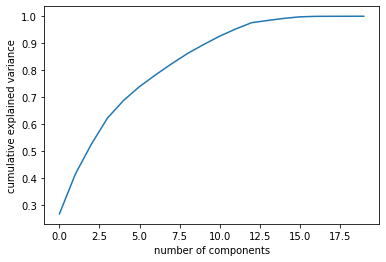

In [46]:
#graficamos el acumulado de varianza explicada en las nuevas dimensiones
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show() 

In [47]:
df_pca = pd.DataFrame (data = df_transforming, columns = ['1','2','3','4','5','6','7','8','9',
                                                          '10','11','12','13','14','15','16',
                                                          '17','18','19','20'])

In [48]:
finalDf = pd.concat ([df_pca, df_normalizado [['lp_seg_hogar']]], axis = 1)

In [49]:
finalDf.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', 'lp_seg_hogar'],
      dtype='object')

In [50]:
finalDf = finalDf.drop(['15','16','17','18','19','20'], axis = 1)

## MODELO

In [51]:
from sklearn.linear_model import LogisticRegression
#clflgr= LogisticRegression(solver = 'liblinear', class_weight='balanced')
from sklearn.neighbors import KNeighborsClassifier
#clfknn = KNeighborsClassifier(n_neighbors=5)
from sklearn.tree import DecisionTreeClassifier
#clftree = DecisionTreeClassifier(criterion = 'entropy', class_weight ='balanced',max_depth=6,min_samples_leaf=100,)
from sklearn.ensemble import RandomForestClassifier
#clfforest = RandomForestClassifier()
from sklearn.model_selection import train_test_split

In [52]:
X = finalDf.drop(['lp_seg_hogar'], axis = 1)
y= finalDf['lp_seg_hogar']
print('Datos X =', X.size, X.shape)
print('Datos y =', y.size, y.shape)

Datos X = 6319236 (451374, 14)
Datos y = 451374 (451374,)


In [53]:
test_size = 0.2
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)

In [54]:
clftree = DecisionTreeClassifier(criterion = 'entropy', class_weight ='balanced',max_depth=6,min_samples_leaf=100,)

In [55]:
clftree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6, min_samples_leaf=100)

In [56]:
predictionstree = clftree.predict(X_test)

In [57]:
probabilitiestree = clftree.predict_proba(X_test)

In [58]:
clftree.predict(X_test)

array([1., 1., 1., ..., 1., 1., 1.])

In [59]:
clftree.predict_proba(X_test)[:, 1]

array([0.7242302 , 0.61544754, 0.7242302 , ..., 0.61544754, 0.70502991,
       0.70502991])

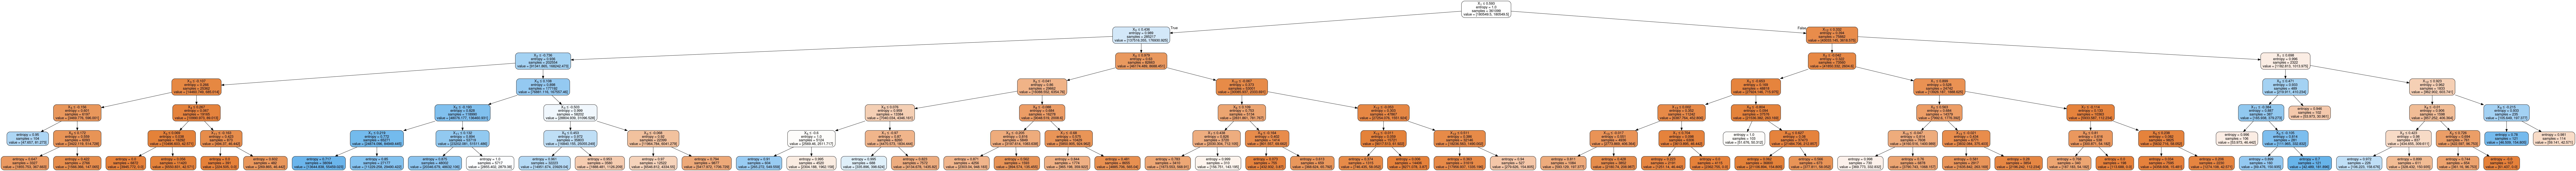

In [61]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
from io import StringIO  
dot_data = StringIO()
export_graphviz(clftree, out_file=dot_data,filled=True, rounded=True,
special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png(),height = 15000,width = 700)

[[50724 27873]
 [ 1212 10466]]


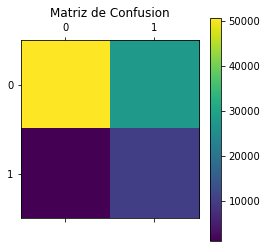

In [62]:
matriz_confusion_clftree = confusion_matrix(y_test,clftree.predict(X_test))
print(matriz_confusion_clftree)
pl.matshow(confusion_matrix(y_test,clftree.predict(X_test)))
pl.title('Matriz de Confusion')
pl.colorbar()
pl.show()

In [63]:
print('========= CLFTREE ===================')
print ('accuracy_score = ', accuracy_score(y_test,clftree.predict(X_test)))
print('====================================')
print('precision =', precision_score(y_test,clftree.predict(X_test)))
print('====================================')
print('recall =', recall_score(y_test,clftree.predict(X_test)))
print('====================================')
print('f1_score =', f1_score(y_test,clftree.predict(X_test)))
print('====================================')
print('roc_auc_score =', roc_auc_score(y_test,clftree.predict_proba(X_test)[:, 1]))
print('====================================')
#print('classification_report')
#print(classification_report(y_test, clftree.predict(X_test)))

========= CLFTREE ===================
accuracy_score =  0.6778177790085849
precision = 0.2729857325438848
recall = 0.8962151053262545
f1_score = 0.41849771077833536
roc_auc_score = 0.8232327844852259


## Pintamos Curva Roc

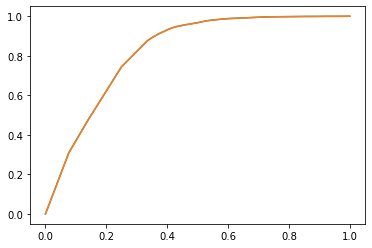

In [69]:
# We chose the target
target_pos = 1 # Or 0 for the other class
fp,tp,_ = roc_curve(y_test,clftree.predict_proba(X_test)[:,target_pos])
plt.plot(fp,tp)
fp,tp,_ = roc_curve(y_test,clftree.predict_proba(X_test)[:,target_pos])
plt.plot(fp,tp)

## GridSearchCV

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
DecisionTreeClassifier()

DecisionTreeClassifier()

In [90]:
tree_grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [2,4,6,8,10,12],
    'min_samples_split' : [2,4,6,8,10,12],
    'min_samples_leaf' : [100,150,200]
    }

treegs = GridSearchCV(
        clftree,
        tree_grid_params,
        verbose = 1,
        cv = 3,
        n_jobs = -1
        )

In [91]:
treegs.fit(X_train,y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 438 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 648 out of 648 | elapsed: 19.8min finished


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              max_depth=12,
                                              min_samples_leaf=2),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [100, 150, 200],
                         'min_samples_split': [2, 4, 6, 8, 10, 12]},
             verbose=1)

In [98]:
treegs.best_score_

0.708589606231214

In [102]:
treegs.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=12,
                       min_samples_leaf=100, min_samples_split=4)

In [103]:
treegs.best_params_

{'criterion': 'gini',
 'max_depth': 12,
 'min_samples_leaf': 100,
 'min_samples_split': 4}

## Hacemos el modelo con los mejores parametros

In [132]:
clftree = DecisionTreeClassifier(criterion = 'gini', class_weight ='balanced',
                                 max_depth=6,min_samples_leaf=50,
                                 min_samples_split = 4)

In [133]:
clftree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6,
                       min_samples_leaf=50, min_samples_split=4)

In [134]:
predictionstree = clftree.predict(X_test)

In [135]:
probabilitiestree = clftree.predict_proba(X_test)

In [136]:
clftree.predict(X_test)

array([1., 1., 1., ..., 1., 1., 1.])

In [137]:
clftree.predict_proba(X_test)[:, 1]

array([0.71570196, 0.61035443, 0.6992045 , ..., 0.61035443, 0.7153048 ,
       0.67987266])

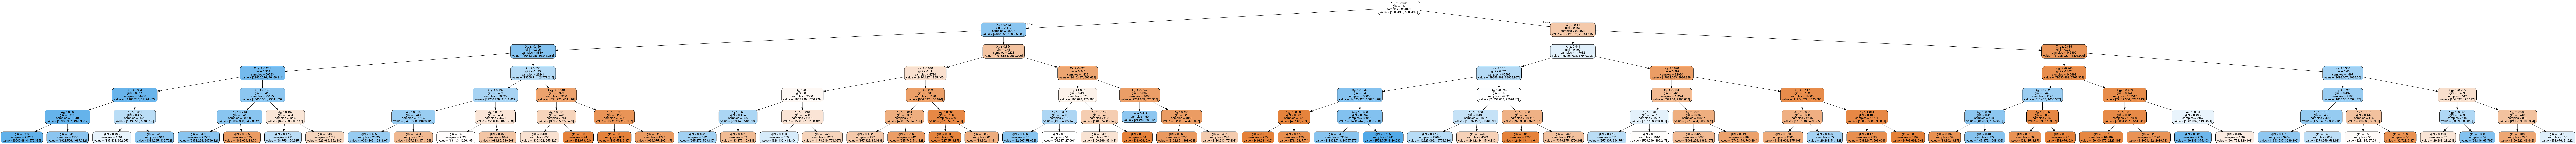

In [138]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
from io import StringIO  
dot_data = StringIO()
export_graphviz(clftree, out_file=dot_data,filled=True, rounded=True,
special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png(),height = 15000,width = 700)

[[51826 26771]
 [ 1296 10382]]


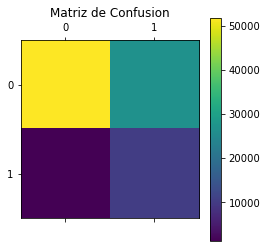

In [139]:
matriz_confusion_clftree = confusion_matrix(y_test,clftree.predict(X_test))
print(matriz_confusion_clftree)
pl.matshow(confusion_matrix(y_test,clftree.predict(X_test)))
pl.title('Matriz de Confusion')
pl.colorbar()
pl.show()

In [140]:
print('========= CLFTREE ===================')
print ('accuracy_score = ', accuracy_score(y_test,clftree.predict(X_test)))
print('====================================')
print('precision =', precision_score(y_test,clftree.predict(X_test)))
print('====================================')
print('recall =', recall_score(y_test,clftree.predict(X_test)))
print('====================================')
print('f1_score =', f1_score(y_test,clftree.predict(X_test)))
print('====================================')
print('roc_auc_score =', roc_auc_score(y_test,clftree.predict_proba(X_test)[:, 1]))
print('====================================')
#print('classification_report')
#print(classification_report(y_test, clftree.predict(X_test)))

========= CLFTREE ===================
accuracy_score =  0.6890944336748823
precision = 0.27943907625225417
recall = 0.8890220928241137
f1_score = 0.42522168294730806
roc_auc_score = 0.8261244986284697


## Pintamos Curva Roc

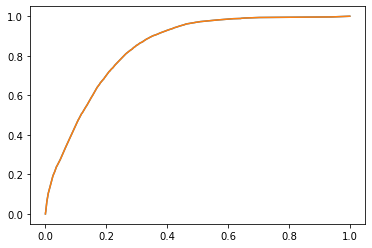

In [113]:
# We chose the target
target_pos = 1 # Or 0 for the other class
fp,tp,_ = roc_curve(y_test,clftree.predict_proba(X_test)[:,target_pos])
plt.plot(fp,tp)
fp,tp,_ = roc_curve(y_test,clftree.predict_proba(X_test)[:,target_pos])
plt.plot(fp,tp)